# Tugas 2

#### NAMA     : AHMED FATHIR SYAFAAT
#### KELAS    : TI - 3H
#### NIM      : 2241720083




Buatlah model CNN untuk klasifikasi dataset MNIST.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [ ]:
# Preprocessing Data
# Reshape data to add a single color channel (karena dataset MNIST grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Buat Model CNN
model = models.Sequential()

# Layer Konvolusi dan Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten layer untuk meratakan output dari layer konvolusi
model.add(layers.Flatten())
# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))
# Output Layer dengan 10 neuron (untuk 10 kelas angka 0-9)
model.add(layers.Dense(10, activation='softmax'))

c:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile Model CNN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit Model CNN
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8980 - loss: 0.3315 - val_accuracy: 0.9856 - val_loss: 0.0409
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9889 - val_loss: 0.0339
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.9890 - val_loss: 0.0342
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9917 - loss: 0.0274 - val_accuracy: 0.9902 - val_loss: 0.0321
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9943 - loss: 0.0186 - val_accuracy: 0.9907 - val_loss: 0.0327
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9888 - val_loss: 0.0415
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9909 - val_loss: 0.0319
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9970 - loss: 0

313/313 - 1s - 2ms/step - accuracy: 0.9911 - loss: 0.0375
Test Accuracy: 0.991100013256073


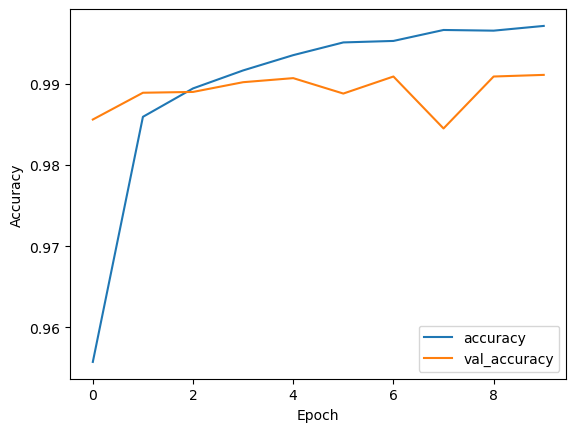

In [ ]:
# Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Evaluasi model pada data testing
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy:", test_acc)

In [ ]:
print("Test Accuracy:", test_acc)

Test Accuracy: 0.991100013256073
